In [2]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [3]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [4]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
INSTITUTION_ID = "ins_109508"

In [6]:
# Retreive API Key and Store as variable 
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_SBX_SECRET_KEY = os.getenv('PLAID_SBX_SECRET_KEY')
#check if it worked 
type(PLAID_CLIENT_ID)

str

In [7]:
#Create client object 
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')
# Get institutions
client.Institutions.get(2)

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': False,
   'input_spec': 'fixed',
   'institution_id': 'ins_25',
   'mfa': [],
   'mfa_code_type': 'numeric',
   'name': 'Ally Bank',
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': ['124003116']},
  {'country_codes': ['US'],
   'credentials': [{'label': 'Login ID', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_113968',
   'mfa': ['questions'],
   'mfa_code_type': 'numeric',
   'name': 'Amegy Bank of Texas - Personal Banking',
   'products': ['assets', 'auth', 'balance', 'transactions', 'income'],
   'routing_numbers': ['113011258']}],
 'request_id': 'XnTWaNGsh8kpf0k',
 'total': 10

### 2. Generate a public token

In [8]:
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [9]:
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
# Store as variable 
access_token = exchange_response['access_token'] 

### 4. Fetch Accounts

In [10]:
client.Accounts.get(access_token) 

{'accounts': [{'account_id': '6a88G5jEJ7i6Nb13nkn3Ie1Z8P8qr8HgW14Dk',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'X455A6vWp9sZyA3lR4RlTwRpBzB37BFd41GK8',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'Dg55k6ADKvteyWA53m35flkKNMNAqNivg4bWp',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [11]:
# Get transactions for institution for specific date range 
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
#get transactions for date range 
transaction_response = client.Transactions.get(access_token,start_date,end_date)


### 2. Print the categories for each transaction

In [12]:
# print
print(json.dumps(transaction_response['transactions'][:2],indent=4, sort_keys=True)) 

[
    {
        "account_id": "6a88G5jEJ7i6Nb13nkn3Ie1Z8P8qr8HgW14Dk",
        "account_owner": null,
        "amount": 6.33,
        "category": [
            "Travel",
            "Car Service",
            "Ride Share"
        ],
        "category_id": "22006001",
        "date": "2019-10-01",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "Uber 072515 SF**POOL**",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
        "pending_transaction_id": null,
     

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [13]:
# New data frame with new fields 
transaction_df = pd.DataFrame(transaction_response['transactions'],columns=['date','name','amount','category'])
# combine categories 
cat_df = pd.DataFrame(transaction_df['category'].str[0]).rename(columns={'category':'spending_category'})
transaction_new_df=pd.concat([transaction_df, cat_df], axis="columns", join="inner").drop(columns='category')
transaction_new_df.head()

,date,name,amount,spending_category
0,2019-10-01,Uber 072515 SF**POOL**,6.33,Travel
1,2019-09-28,Tectra Inc,500.00,Food and Drink
2,2019-09-27,AUTOMATIC PAYMENT - THANK,2078.50,Payment
3,2019-09-27,KFC,500.00,Food and Drink
4,2019-09-27,Madison Bicycle Shop,500.00,Shops


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [14]:
# convert data 
transaction_new_df['amount'].astype(float,inplace=True)
transaction_new_df['date']= pd.to_datetime(transaction_new_df['date'])
transaction_new_df.dtypes


date                 datetime64[ns]
name                         object
amount                      float64
spending_category            object
dtype: object

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [15]:
# get income 
Income = client.Income.get(access_token)
Income

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'Kofip0oiJTPpqS5'}

In [16]:
# previous years gross income 
print("last_year_income: 6000")

last_year_income: 6000


In [17]:
print("monthly_income : 500")

monthly_income : 500


In [18]:
print ('project_yearly_income: 6085')

project_yearly_income: 6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002565E4D9588>],
      dtype=object)

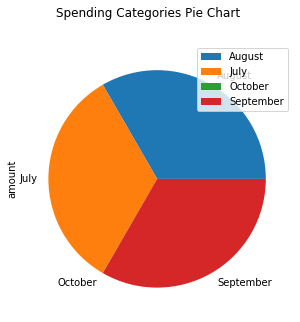

In [21]:
transaction_new_df.groupby(transaction_new_df['date'].dt.strftime('%B')).sum().plot.pie(figsize=(10,5), subplots= "true", title="Spending Categories Pie Chart")


### Calculate the expenses per month

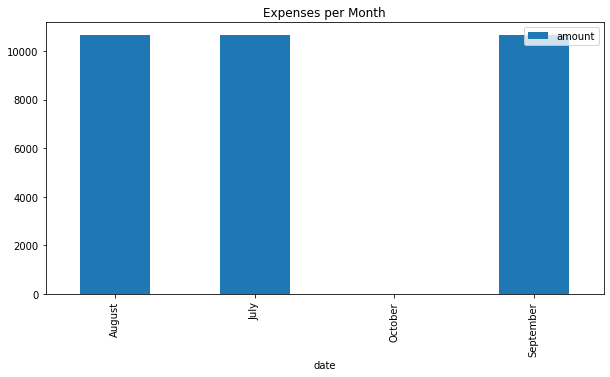

In [23]:
# graph expense per month 
transaction_new_df.groupby(transaction_new_df['date'].dt.strftime('%B')).sum().plot.bar(figsize=(10,5),title="Spending per Month Car Chart")
